## Experimenting with graphing a single random game

In [186]:
import chess.engine
import chess.pgn

In [223]:
pgn = open("../data/Carlsen, Magnus.pgn")
first_game = chess.pgn.read_game(pgn)
print("Game: ", first_game.headers)

Game:  Headers(Event='Titled Arena Apr 3rd 2021', Site='?', Date='2021.3.3.', Round='?', White='Carlsen,M', Black='Sahidi,Samir', Result='0-1', BlackElo='2406', BlackTitle='IM', WhiteElo='2847', WhiteTitle='GM')


In [224]:
board = first_game.board()
engine = chess.engine.SimpleEngine.popen_uci(
    "../stockfish_15.1_linux_x64_avx2/stockfish-ubuntu-20.04-x86-64-avx2"
)

print(board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


In [225]:
board = first_game.board()
engine = chess.engine.SimpleEngine.popen_uci(
    "../stockfish_15.1_linux_x64_avx2/stockfish-ubuntu-20.04-x86-64-avx2"
)

engine.configure({"Threads" : 5})

print(board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


In [226]:
advantages = []

Speed with 20 cores: 36.1307909488678  
Speed with 10 cores: 36.14224123954773  
Speed with 5 cores: 36.12040829658508  
Speed with 1 core: ?  
(anal time of 1 second)

In [227]:
import time
start_time = time.time()

for move in first_game.mainline_moves():
    board.push(move)
    info = engine.analyse(board, chess.engine.Limit(time=1))
    advantages.append(info["score"].white().score())
    
print("total time", time.time() - start_time)

total time 36.12040829658508


In [42]:
advantages

[-14,
 -19,
 -117,
 -118,
 -117,
 -127,
 -137,
 -143,
 -141,
 -145,
 -165,
 -157,
 -152,
 -150,
 -160,
 -149,
 -170,
 -165,
 -191,
 -187,
 -216,
 -145,
 -148,
 -94,
 -149,
 -94,
 -103,
 -107,
 -115,
 -113,
 -134,
 -72,
 -86,
 -67,
 -858,
 -864]

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

<AxesSubplot:>

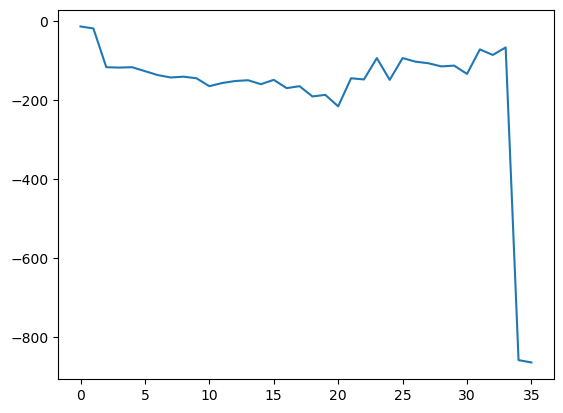

In [44]:
sns.lineplot(advantages)

In [49]:
# We can see black (Carlsen's opponent) won, thus the score is negative
first_game.headers["Result"]

'0-1'

## Extracting relevant games between Carlsen and the top players Using Regex

In [54]:
from pathlib import Path
import re

In [53]:
pgn_dir = Path("../data/")
list(pgn_dir.iterdir())

[PosixPath('../data/Nakamura, Hikaru.pgn'),
 PosixPath('../data/Caruana, Fabiano.pgn'),
 PosixPath('../data/So, Wesley.pgn'),
 PosixPath('../data/Radjabov, Teimour.pgn'),
 PosixPath('../data/Anand, Viswanathan.pgn'),
 PosixPath('../data/Giri, Anish.pgn'),
 PosixPath('../data/Firouzja, Alireza.pgn'),
 PosixPath('../data/Carlsen, Magnus.pgn'),
 PosixPath('../data/Ding, Liren.pgn'),
 PosixPath('../data/Karjakin, Sergey.pgn'),
 PosixPath('../data/Nepomniachtchi, Ian.pgn')]

In [ ]:
To match from the first bracket before white to the end of line for either white or black (whichever has Carlsen on it:
```python
r'\[White \"(Carlsen|[\s\S]*Black \"Carlsen).*\]'
```

In [136]:
# pattern = re.compile(r".*Carlsen.*")
pattern = re.compile(r'\[White \"(Carlsen|[\s\S]+?Black \"Carlsen).*\][\s\S]+?(\n){3}')

In [137]:
for pgn_path in pgn_dir.iterdir():
    with open(pgn_path, "r") as pgn_file:
        pgn_str = pgn_file.read()
        match = pattern.search(pgn_str)
    
    break

In [138]:
len(pattern.findall(pgn_str))

117

In [141]:
pattern.findall(pgn_str)[0]

('Vachier Lagrave,M"]\n[Black "Nakamura,Hi"]\n[Event "chess.com SF Blitz Extra 1m+1spm 2016"]\n[Date "2016.7.24."]\n[WhiteTitle "GM"]\n[BlackTitle "GM"]\n[WhiteElo "2819"]\n[BlackElo "2791"]\n[Result "1-0"]\n\n1. Nf3 g6 2. g3 Bg7 3. Bg2 d6 4. O-O Nc6 5. Re1 Bd7 6. e3 Qc8 7. d4 Bh3 8. c4 h5\n9. Nc3 h4 10. Nxh4 Bf6 11. Nf3 Bxg2 12. Kxg2 Qh3+ 13. Kg1 g5 14. Nd5 g4 15.\nNxc7+ Kd7 16. Nxa8 gxf3 17. Qxf3 Qxh2+ 18. Kf1 Bxd4 19. exd4 Qh3+ 20. Qg2 Qh1+\n21. Qxh1 Rxh1+ 22. Ke2 Nxd4+ 23. Kd1 Rxe1+ 24. Kxe1 Nc2+ 25. Kd1 Nxa1 26. Be3 b6\n27. Kc1 Kc6 28. Kb1 Kb7 29. Nxb6 axb6 30. Kxa1 Nf6 31. b3 Ng4 32. Kb2 e5 33. Kc3\nf5 34. Kd3 Kc6 35. a4 e4+ 36. Kd4 Ne5 37. b4 Nf3+ 38. Kc3 Ne5 39. b5+ Kc7 40.\nKd4 Ng4 41. Kd5 Kd7 42. Bxb6 Nf6+ 43. Kd4 1-0\n\n\n[White "Nakamura,Hi"]\n[Black "Villalba,M"]\n[Event "Titled Tuesday 18th Jan"]\n[Date "2022.0.18."]\n[WhiteTitle "GM"]\n[BlackTitle "IM"]\n[WhiteElo "2736"]\n[BlackElo "2258"]\n[Result "1-0"]\n\n1. Nf3 d6 2. d4 Nf6 3. Nc3 g6 4. e4 Bg7 5. Bc4 O-O 6. Bb3 Nc6 

In [142]:
with open("../data/test.pgn", "w") as f:
    f.write(pattern.findall(pgn_str)[0][0])

In [100]:
pgn_str[slice(*match.span())]

'[White "Vachier Lagrave,M"]\n[Black "Nakamura,Hi"]\n[Event "chess.com SF Blitz Extra 1m+1spm 2016"]\n[Date "2016.7.24."]\n[WhiteTitle "GM"]\n[BlackTitle "GM"]\n[WhiteElo "2819"]\n[BlackElo "2791"]\n[Result "1-0"]\n\n1. Nf3 g6 2. g3 Bg7 3. Bg2 d6 4. O-O Nc6 5. Re1 Bd7 6. e3 Qc8 7. d4 Bh3 8. c4 h5\n9. Nc3 h4 10. Nxh4 Bf6 11. Nf3 Bxg2 12. Kxg2 Qh3+ 13. Kg1 g5 14. Nd5 g4 15.\nNxc7+ Kd7 16. Nxa8 gxf3 17. Qxf3 Qxh2+ 18. Kf1 Bxd4 19. exd4 Qh3+ 20. Qg2 Qh1+\n21. Qxh1 Rxh1+ 22. Ke2 Nxd4+ 23. Kd1 Rxe1+ 24. Kxe1 Nc2+ 25. Kd1 Nxa1 26. Be3 b6\n27. Kc1 Kc6 28. Kb1 Kb7 29. Nxb6 axb6 30. Kxa1 Nf6 31. b3 Ng4 32. Kb2 e5 33. Kc3\nf5 34. Kd3 Kc6 35. a4 e4+ 36. Kd4 Ne5 37. b4 Nf3+ 38. Kc3 Ne5 39. b5+ Kc7 40.\nKd4 Ng4 41. Kd5 Kd7 42. Bxb6 Nf6+ 43. Kd4 1-0\n\n\n[White "Nakamura,Hi"]\n[Black "Villalba,M"]\n[Event "Titled Tuesday 18th Jan"]\n[Date "2022.0.18."]\n[WhiteTitle "GM"]\n[BlackTitle "IM"]\n[WhiteElo "2736"]\n[BlackElo "2258"]\n[Result "1-0"]\n\n1. Nf3 d6 2. d4 Nf6 3. Nc3 g6 4. e4 Bg7 5. Bc4 O-O 6. B

In [101]:
match.span()

(0, 3699702)

# Actual Code Starts Here

Plan:
1. Extract each relevant game to its own pgn in a seperate directory
2. Create a df that has each game's advantage over time by GM vs Carlsen
3. Graph those and make them look good

## Extracting Using Chess PGNs

In [180]:
from pathlib import Path
import logging

In [181]:
pgn_dir = Path("../data/all-gm-games/")
list(pgn_dir.iterdir())

[PosixPath('../data/all-gm-games/Nakamura, Hikaru.pgn'),
 PosixPath('../data/all-gm-games/Caruana, Fabiano.pgn'),
 PosixPath('../data/all-gm-games/So, Wesley.pgn'),
 PosixPath('../data/all-gm-games/Radjabov, Teimour.pgn'),
 PosixPath('../data/all-gm-games/Anand, Viswanathan.pgn'),
 PosixPath('../data/all-gm-games/Giri, Anish.pgn'),
 PosixPath('../data/all-gm-games/Firouzja, Alireza.pgn'),
 PosixPath('../data/all-gm-games/Ding, Liren.pgn'),
 PosixPath('../data/all-gm-games/Karjakin, Sergey.pgn'),
 PosixPath('../data/all-gm-games/Nepomniachtchi, Ian.pgn')]

In [182]:
output_dir = Path("../data/relevant-games")
output_dir.mkdir(parents=True, exist_ok=True)

In [183]:
# Hide unneccsary clutter
logging.getLogger("chess.pgn").setLevel(logging.CRITICAL)

In [186]:
for pgn_path in pgn_dir.iterdir():
    with open(pgn_path, "r") as pgn_file:
        while True:
            curr_game = chess.pgn.read_game(pgn_file)

            if curr_game is None:
                break

            white = curr_game.headers["White"]
            black = curr_game.headers["Black"]
            date = curr_game.headers["Date"][:-1]
            round_num = curr_game.headers["Round"]
            fname = white + "-" + black + "-" + date + "-" + round_num + ".pgn"

            # check if Carlsen played in this game
            if "Carlsen" in white + black:
                # print("Writing out to file", fname)
                print(curr_game, file=open(output_dir / fname, "w"), end="\n\n\n")

## Building Data

In [240]:
from pathlib import Path
import chess.engine
import chess.pgn
from tqdm import tqdm

In [241]:
engine = chess.engine.SimpleEngine.popen_uci(
    "../stockfish_15.1_linux_x64_avx2/stockfish-ubuntu-20.04-x86-64-avx2"
)
engine.configure({"Threads" : 20})
anal_time = 0.1

# each GM will be mapped from their name to a list of lists of adv overtime
data_dict = {}

In [242]:
pgn_dir = Path("../data/relevant-games/")
for pgn_path in tqdm(list(pgn_dir.iterdir())):
    game = chess.pgn.read_game(open(pgn_path))
    
    # determine who Carlsen is playing:
    if "Carlsen" in game.headers["White"]:
        carlsen_white = True
        opp = game.headers["Black"]
    elif "Carlsen" in game.headers["Black"]:
        carlsen_white = False
        opp = game.headers["White"]
    else:
        # sanity check for data
        print(game.headers)
        print(pgn_path)
        raise ValueError("should not be non-Carlsen data!.")
    
    # create adv over time list
    advantages = []
    board = game.board()
    for move in game.mainline_moves():
        board.push(move)
        score = engine.analyse(board, chess.engine.Limit(time=anal_time))["score"]
        # using score normalized to Carlsen's pov
        score = (score.white() if carlsen_white else score.black()).score()
        advantages.append(score)
    
    # add to data dict
    if opp not in data_dict:
        data_dict[opp] = []
    data_dict[opp].append(advantages)

  0%|                                                                                                                                    | 2/2173 [00:28<8:33:55, 14.20s/it]


KeyboardInterrupt: 

In [ ]:
import pickle

with open('../data/data-dict-corrected-score.pkl', 'wb') as f:
    pickle.dump(data_dict, f)
        
# with open('./data_dict.pkl', 'rb') as f:
#     loaded_dict = pickle.load(f)

## Fixing issue I made. Ignore colapsed code here.

In [75]:
gms = [
"Nakamura,Hi",
"Caruana,F",
"So,W",
"Radjabov,T",
"Anand,V",
"Giri,A",
"Firouzja,Alireza",
"Ding Liren",
"Karjakin,Sergey",
"Nepomniachtchi,I",
]

In [76]:
# fixing my broken code
for opp in list(data_dict.keys()):
    valid = False
    for gm in gms:
        if gm in opp:
            valid = True
    
    if not valid:
        # remove from data_dict
        del data_dict[opp]

In [77]:
len(data_dict)

10

In [78]:
with open('../data/data-dict.pkl', 'wb') as f:
    pickle.dump(data_dict, f)

## Creating DataFrame

In [80]:
import pandas as pd

In [98]:
max_games = 0
max_steps = 0

for opp in data_dict.values():
    if len(opp) > max_games:
        max_games = len(opp)
    for game in opp:
        if len(game) > max_steps:
            max_steps = len(game)
            
print(max_games, max_steps)

250 283


In [150]:
empty_game = [None] * max_steps
# padding data to be equal length
for opp_data in data_dict.values():
    for game in opp_data:
        game += [None] * (max_steps - len(game))
    
    opp_data += [empty_game] * (max_games - len(opp_data))

In [155]:
test = {}
for opp, opp_data in data_dict.items():
    test[opp] = {f"Game {i}": adv for i, adv in enumerate(opp_data)}

In [164]:
df = pd.DataFrame(data_dict)
df

,"Karjakin,Sergey","Caruana,F",Ding Liren,"Giri,A","So,W","Nakamura,Hi","Anand,V","Firouzja,Alireza","Nepomniachtchi,I","Radjabov,T"
0,"[24, 39, 32, 40, 21, 7, 14, 23, 17, 19, 26, 10...","[33, 27, 41, 32, 39, 39, 30, 42, 54, 57, -8, 2...","[30, 45, 42, 41, 36, 29, 33, 38, 36, 49, 41, 3...","[25, 38, 37, 29, 43, 44, 55, 50, 50, 52, 57, 4...","[None, None, None, None, None, None, None, Non...","[19, 19, 44, 38, 27, 28, 45, 42, 46, 42, -12, ...","[17, 31, 26, 28, 23, 43, 42, 44, 45, 30, 40, 3...","[23, 27, 25, 34, 27, 51, 35, 38, 37, 43, 34, 2...","[28, 35, 39, 34, 28, 21, 9, 25, 13, 17, -13, -...","[34, 44, 19, 37, 10, 30, 29, 28, 27, 33, 29, 1..."
1,"[47, 36, 29, 41, 32, 40, 46, 48, 54, 54, 54, 5...","[21, 47, 5, 1, 8, 24, 32, 31, 12, 28, 0, 12, 1...","[42, 37, 28, 38, 43, 33, 46, 45, 32, 35, 31, 4...","[34, 28, 18, 37, 14, 16, 14, 24, 24, 14, 13, 1...","[38, 42, 34, 32, 34, 34, 24, 11, 7, 1, -13, -6...","[36, 32, 36, 45, 33, 45, 19, 13, 5, 25, 22, 18...","[35, 45, 37, 44, 40, 45, 16, 11, 9, 3, 9, 36, ...","[44, 46, 42, 48, 40, 46, 47, 45, -111, -119, -...","[28, 40, 38, 34, 31, 29, 32, 45, 39, 39, 50, 4...","[20, 24, 19, 23, 30, 26, -8, -18, -14, -4, -18..."
2,"[36, 36, 3, 12, 2, 13, 6, 0, -7, 6, -12, -4, -...","[29, 32, 19, 35, 31, 44, 24, 34, 33, 30, 29, 4...","[27, 44, 36, 42, 35, 37, 35, 43, 30, 45, 31, 3...","[-14, -26, -31, -26, -26, -32, -22, -5, -35, 1...","[15, 39, 28, 34, 22, 5, 11, 9, 19, 24, 19, 19,...","[36, 44, 40, 36, 5, 19, 25, 32, 43, 43, 30, 18...","[24, 36, 42, 45, 37, 43, 26, 34, 17, 10, 12, 8...","[38, 26, 44, 48, 39, 36, 27, 31, 25, 31, 27, 3...","[36, 29, 32, 45, 46, 44, 42, 47, 52, 45, 33, 4...","[-16, -13, 2, -6, -8, -7, 0, 9, 2, 14, 12, 34,..."
3,"[21, 34, 34, 30, 35, 34, 43, 42, 54, 44, 57, 5...","[21, 37, 37, 35, 22, 7, 20, 21, 22, 22, 27, 31...","[32, 42, 39, 42, 35, 37, 31, 50, 35, 41, 44, 4...","[33, 35, 4, 21, 9, 8, 0, -5, -14, 18, 7, 13, 1...","[35, 36, 36, 31, 30, 37, 37, 49, 34, 29, 31, 2...","[38, 40, 33, 23, 10, 10, 8, 13, 26, 3, 24, 34,...","[25, 43, 46, 28, 24, 34, 48, 45, 43, 54, 42, 5...","[22, 36, 17, 45, 19, 52, 37, 47, 30, 51, 66, 6...","[33, 40, 36, 28, 38, 49, 44, 49, 52, 58, 55, 6...","[37, 36, 42, 40, 44, 36, 27, 33, 0, 11, -26, 3..."
4,"[28, 34, 40, 27, 31, 38, 30, 40, 22, 29, 21, 3...","[29, 69, 61, 93, 106, 104, 97, 93, 35, 88, 53,...","[24, 34, 27, 30, 41, 42, 18, 33, 21, 14, 10, 1...","[27, 34, 30, 39, 39, 40, 21, 38, 14, 14, 2, 0,...","[24, 32, 26, 31, 31, 36, 24, 33, 13, 39, 38, 5...","[-15, -20, -4, -14, -10, 16, 16, 28, 13, 32, 2...","[29, 45, 35, 40, 24, 32, 13, 21, 17, 24, 20, 1...","[27, 32, 23, 16, 19, 29, 42, 24, 10, 21, 2, 33...","[26, 20, 15, 25, 26, 24, 18, 8, 30, 25, 28, 20...","[24, 20, 21, 28, 33, 44, 24, 13, 21, 24, -1, 1..."
...,...,...,...,...,...,...,...,...,...,...
245,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[32, 34, None, None, None, None, None, None, N...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
246,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[34, 36, 46, 40, 33, 42, 31, 28, 34, 38, 24, 2...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
247,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[Non

In [178]:
with open('../data/df-raw-wrong.pkl', 'wb') as f:
    pickle.dump(df, f)